# Méthode Decision tree : Arbre de décision
Dans cette partie on va utiliser l'algorithme arbre de décision pour prédire les 3 classes, puis on évaluera ses performances avec la matrice de méthode de validation croisée, la matrice de confusion et aussi la courbe ROC.

In [96]:
#Içi on importe les bibliothèques qu'on aura besoin par la suite
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [162]:
# on importe le dataset
dataset = pd.read_csv("Grisoni_et_al_2016_EnvInt88.csv")
# on divise le dataset en deux ensemble , un pour l'entrainement et l'autre pour le test selon un ration 75:25
train = dataset[dataset.Set =="Train"]
test = dataset[dataset.Set =="Test"]
# les features x et les labels y pour l'ensemble d'entrainement.
x_train = train[[ "nHM","ON1V","X2Av","PCD","piPC09","MLOGP","N-072","B02[C-N]","F04[C-O]","logBCF"]]
y_train = train[["Class"]]
# de meme pour l'ensemble de test.
x_test = test[[ "nHM","ON1V","X2Av","PCD","piPC09","MLOGP","N-072","B02[C-N]","F04[C-O]","logBCF"]]
y_test = test[["Class"]]

In [170]:
#On utilise la méthode GridSerachCV pour parcourir l'ensemble de valeurs de l'hyperparamètre et produit celui qui 
# donne un trés bon score.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

parameter_candidates = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]} # valeurs à parcourir
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=DecisionTreeClassifier(max_depth =d), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(x_train, y_train)   
print('Best score for data1:', clf.best_score_) 
# View the best parameters for the model found using grid search
print('Best max-depth:',clf.best_estimator_.max_depth) 

Best score for data1: 0.6815207780725022
Best max-depth: 8


In [154]:
#Içi une deuxième méthode en utilisant la méthode de validation croisée pour chaque max_depth et à la fin on choisit 
# l'hyperparamètre max_depth qui a la plus bonne précision.
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 

X = dataset[["nHM","ON1V","X2Av","PCD","piPC09","MLOGP","N-072","B02[C-N]","F04[C-O]","logBCF"]] #features
y = dataset[["Class"]] # target class

scores = [] # liste dans laquelle on stocke le score de validation de chaque fold.
for d in range (2,15):
    classifier = DecisionTreeClassifier(max_depth =d) #classifier
    score_validation = cross_val_score(classifier, X, y, cv=5).mean() # parmi l'ensemble des scores renvoyer on fait le mean
    scores.append((score_validation,d)) # et on le stocke dans la liste
    
scores #on affiche le score

[(0.6379900744416873, 2),
 (0.6393052109181141, 3),
 (0.6957981803143094, 4),
 (0.6907030603804798, 5),
 (0.6996112489660876, 6),
 (0.6919437551695616, 7),
 (0.7047559966914806, 8),
 (0.7047808105872623, 9),
 (0.6996360628618694, 10),
 (0.6752522746071133, 11),
 (0.6752357320099256, 12),
 (0.6611083540115799, 13),
 (0.6803639371381307, 14)]

In [197]:
# Ici on calcule la précision de notre algorithme sur des nouvelles données (y_test)
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier(max_depth =8).fit(x_train, y_train) # on prend max_depth qui donne la plus forte précision daprès GridSearchCV

dtree_predictions = classifier.predict(x_test)  # on évalue le modèle sur les données de test
accuracy = accuracy_score(y_test,dtree_predictions ) # on calcule le score
accuracy # on affiche le score

0.6871794871794872

In [198]:
#Içi on calcule la matrice de confusion ainsi les reports de classification
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,dtree_predictions))
print(classification_report(y_test,dtree_predictions))


[[100   6   9]
 [  8   6   2]
 [ 34   2  28]]
              precision    recall  f1-score   support

           1       0.70      0.87      0.78       115
           2       0.43      0.38      0.40        16
           3       0.72      0.44      0.54        64

    accuracy                           0.69       195
   macro avg       0.62      0.56      0.57       195
weighted avg       0.69      0.69      0.67       195



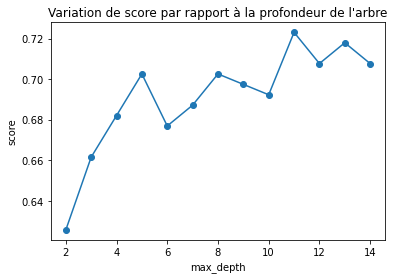

In [320]:
# on étudie la variation de l'hyperparamètre max_depth en fonction de score.
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
##metrics.accuracy_score(y_test, classifier.predict(x_test))
##score = classifier.score(x_test, y_test)
#print('Score: %f' % score)
scores = []
for d in range(2,15):  # on parcourt tous les valeurs de max_depth
    classifier = DecisionTreeClassifier(max_depth = d)  # puis crée le classifier avec la valeur max_depth
    scores.append(classifier.fit(x_train, y_train).score(x_test, y_test)) # on entraine le modèle et on stocke le score dans la liste
 #on affiche le graphe en utilisant la librairie matplotlib    
plt.plot(range(2,15), scores, 'o-')
plt.xlabel("max_depth")
plt.ylabel("score")
plt.title("Variation de score par rapport à la profondeur de l'arbre")

plt.show()

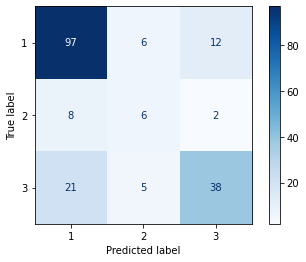

In [252]:
#deuxième façon pour calculer la matrice de confusion avec un nouveau format en utilisant la bibliothèque sklearn
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=[1,2,3],
                                 cmap=plt.cm.Blues)

In [33]:
from sklearn.model_selection import GridSearchCV
pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=pgrid, cv=10)
grid_search.fit(x_train, y_train)
grid_search.best_estimator_.score(x_test, y_test)

0.6820512820512821

In [32]:
dtree_predictions = dtree_model.predict(x_test) 
accurancy = dtree_model.score(x_test,y_test)
print(accurancy)

0.7025641025641025


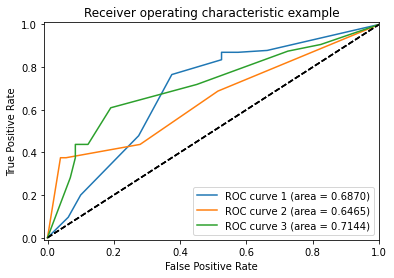

In [199]:
# Courbe ROC : True positive rate et False positive rate
from sklearn.metrics import roc_auc_score,roc_curve,auc
classes = [1, 2, 3]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
        classe = classes[i] 
        y_test_classe = (y_test == classe)
        stat=classifier.predict_proba(x_test)
        fpr, tpr, _ = roc_curve(y_test_classe, stat[:,i])

        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve %s (area = %0.4f)' %(classe, roc_auc))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([-0.01, 1.0])
        plt.ylim([-0.01, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
plt.show()